# GDP and Unemployment Analysis (1995–2025)

## Introduction

Economic growth and unemployment are two of the most important indicators for assessing the health of an economy. 
While GDP per capita reflects changes in living standards and productivity, unemployment captures the ability of an 
economy to generate jobs. 

A central concept in this context is Okun’s Law, which describes the negative relationship between GDP growth 
and changes in the unemployment rate: when the economy grows faster, unemployment tends to decline, and vice versa. 

In this project, I use World Bank data to explore the dynamics of GDP per capita and unemployment across countries 
and regions. I compare patterns for selected aggregates (World, European Union, East Asia & Pacific, Sub-Saharan Africa) 
as well as for Germany and the United States. Finally, I test Okun’s Law by examining the correlation between GDP 
growth and changes in unemployment.

## Data Cleaning

In [65]:
# import the modules
import pandas as pd
import matplotlib.pyplot as plt
import pycountry as pc

print("All libraries loaded successfully")

All libraries loaded successfully


In [67]:
# import the csv files

df_gdp = pd.read_csv(r"C:\Users\Nils\Desktop\Uni\Data analytics\projects\python_project\gdp_data.csv", skiprows=4)
df_u = pd.read_csv(r"C:\Users\Nils\Desktop\Uni\Data analytics\projects\python_project\unemployment_data.csv", skiprows=4)

print("csv files imported")

csv files imported


In [69]:
# get an overview of the gdp-data
df_gdp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,27441.529662,28440.051964,30082.127645,31096.205074,22855.932320,27200.061079,30559.533535,33984.790620,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,186.121835,186.941781,197.402402,225.440494,208.999748,226.876513,...,1329.807285,1520.212231,1538.901679,1493.817938,1344.103210,1522.393346,1628.318944,1568.159891,1673.841139,NaN
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,522.082216,525.469771,491.337221,496.602504,510.787063,356.496214,357.261153,413.757895,NaN,NaN
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,121.939925,127.454189,133.827044,139.008291,148.549379,155.565216,...,1630.039447,1574.230560,1720.140280,1798.340685,1680.039332,1765.954788,1796.668633,1599.392983,1284.154441,NaN
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1807.952941,2437.259712,2538.591391,2189.855714,1449.922867,1925.874661,2929.694455,2309.534130,2122.083690,NaN


In [71]:
# get an overview of the unemployment-data
df_u.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.194666,7.346331,7.360513,7.584419,8.191395,8.577385,7.985202,7.806365,7.772654,NaN
2,Afghanistan,AFG,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,10.133000,11.184000,11.196000,11.185000,11.710000,11.994000,14.100000,13.991000,13.295000,NaN
3,Africa Western and Central,AFW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,4.157574,4.274196,4.323631,4.395271,4.852393,4.736732,3.658573,3.277245,3.218313,NaN
4,Angola,AGO,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,16.575000,16.610000,16.594000,16.497000,16.690000,15.799000,14.602000,14.537000,14.464000,NaN


In [73]:
# I only want to analyze years from 1995 - 2025 (30 years). Drop earlier years
df_gdp_drop = df_gdp.drop(columns=[c for c in df_gdp.columns if c.isdigit() and int(c) < 1995])
df_u_drop   = df_u.drop(columns=[c for c in df_u.columns if c.isdigit() and int(c) < 1995])

In [75]:
df_gdp_drop.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1995,1996,1997,1998,1999,2000,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,16548.717387,16620.954556,17750.009564,18828.087059,19216.197235,20681.023027,...,27441.529662,28440.051964,30082.127645,31096.205074,22855.932320,27200.061079,30559.533535,33984.790620,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,766.820591,747.069674,767.684192,697.352672,670.697829,707.120378,...,1329.807285,1520.212231,1538.901679,1493.817938,1344.103210,1522.393346,1628.318944,1568.159891,1673.841139,NaN
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,174.930991,...,522.082216,525.469771,491.337221,496.602504,510.787063,356.496214,357.261153,413.757895,NaN,NaN
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,863.950571,1065.683499,1088.996805,1137.744496,521.364734,516.932316,...,1630.039447,1574.230560,1720.140280,1798.340685,1680.039332,1765.954788,1796.668633,1599.392983,1284.154441,NaN
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,404.294818,531.115367,521.702915,429.188127,392.725539,563.733796,...,1807.952941,2437.259712,2538.591391,2189.855714,1449.922867,1925.874661,2929.694455,2309.534130,2122.083690,NaN


In [77]:
df_u_drop.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1995,1996,1997,1998,1999,2000,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,7.908446,7.823908,7.783654,7.812734,7.849878,7.788317,...,7.194666,7.346331,7.360513,7.584419,8.191395,8.577385,7.985202,7.806365,7.772654,NaN
2,Afghanistan,AFG,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,7.817000,7.867000,7.863000,7.890000,7.903000,7.935000,...,10.133000,11.184000,11.196000,11.185000,11.710000,11.994000,14.100000,13.991000,13.295000,NaN
3,Africa Western and Central,AFW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,4.399749,4.340691,4.313735,4.324049,4.512158,4.551119,...,4.157574,4.274196,4.323631,4.395271,4.852393,4.736732,3.658573,3.277245,3.218313,NaN
4,Angola,AGO,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,16.987000,16.275000,16.172000,16.371000,16.593000,16.682000,...,16.575000,16.610000,16.594000,16.497000,16.690000,15.799000,14.602000,14.537000,14.464000,NaN


In [79]:
# drop irrelevant columns
df_gdp_drop = df_gdp_drop.drop(columns = ["Indicator Code", "Unnamed: 69", "Indicator Name"], errors="ignore")
df_u_drop = df_u_drop.drop(columns = ["Indicator Code", "Unnamed: 69", "Indicator Name"], errors="ignore")

# drop rows with no GDP / Unemployment data
#define the columns that are relevant
year_cols = [str(y) for y in range(1995, 2025)]

empty_rows_gdp = df_gdp_drop[df_gdp_drop[year_cols].isnull().all(axis=1)]
empty_rows_u = df_u_drop[df_u_drop[year_cols].isnull().all(axis=1)]

print(empty_rows_gdp[["Country Name", "Country Code"]])
print(empty_rows_u[["Country Name", "Country Code"]])


                  Country Name Country Code
84                   Gibraltar          GIB
110             Not classified          INX
193  Korea, Dem. People's Rep.          PRK
255     British Virgin Islands          VGB
                  Country Name Country Code
0                        Aruba          ABW
6                      Andorra          AND
11              American Samoa          ASM
12         Antigua and Barbuda          ATG
27                     Bermuda          BMU
51                     Curacao          CUW
52              Cayman Islands          CYM
57                    Dominica          DMA
78               Faroe Islands          FRO
79       Micronesia, Fed. Sts.          FSM
84                   Gibraltar          GIB
90                     Grenada          GRD
91                   Greenland          GRL
108                Isle of Man          IMN
110             Not classified          INX
124                   Kiribati          KIR
125        St. Kitts and Nevis  

In [81]:
#drop these rows
df_gdp_drop = df_gdp_drop.drop(empty_rows_gdp.index)
df_u_drop = df_u_drop.drop(empty_rows_u.index)

In [83]:
# reshape to long format (otherwise years stuck in column headers -> hard to filter, hard to merge datasets etc.)
gdp_long = df_gdp_drop.melt(id_vars=["Country Name","Country Code"], var_name="Year", value_name="GDP_pc")
u_long   = df_u_drop.melt(id_vars=["Country Name","Country Code"], var_name="Year", value_name="Unemployment_rate")

In [85]:
gdp_long.head()
u_long.head()

,Country Name,Country Code,Year,Unemployment_rate
0,Africa Eastern and Southern,AFE,1995,7.908446
1,Afghanistan,AFG,1995,7.817000
2,Africa Western and Central,AFW,1995,4.399749
3,Angola,AGO,1995,16.987000
4,Albania,ALB,1995,14.607000


In [87]:
# check the data types of gdp-dataset
gdp_long.dtypes

Country Name     object
Country Code     object
Year             object
GDP_pc          float64
dtype: object

In [89]:
# check the data types of unemployment-dataset
u_long.dtypes

Country Name          object
Country Code          object
Year                  object
Unemployment_rate    float64
dtype: object

In [91]:
# convert year into numeric
gdp_long["Year"] = gdp_long["Year"].astype(int)
u_long["Year"] = u_long["Year"].astype(int)

In [93]:
# count how many rows drop out if we dont do an outer merge
merged_outer = gdp_long.merge(u_long, on=["Country Name","Country Code","Year"], how="outer", indicator=True)
print(merged_outer["_merge"].value_counts())

_merge
both          7020
left_only      840
right_only      30
Name: count, dtype: int64


In [95]:
# as I am analyzing GDP vs. Unemployment, both values need to be present. Therfore to merge the datasets I use an inner join
merged = gdp_long.merge(u_long, on=["Country Name","Country Code","Year"], how="inner")

In [97]:
# Overview of cleaned and merged dataset
merged.head()

,Country Name,Country Code,Year,GDP_pc,Unemployment_rate
0,Africa Eastern and Southern,AFE,1995,766.820591,7.908446
1,Afghanistan,AFG,1995,NaN,7.817000
2,Africa Western and Central,AFW,1995,863.950571,4.399749
3,Angola,AGO,1995,404.294818,16.987000
4,Albania,ALB,1995,911.320465,14.607000


In [99]:
# for the descriptive analytics I create one dataset only containing the regional aggregates, the second one containing only country-level data.
# show unique values for country name
iso_alpha3 = [c.alpha_3 for c in pc.countries]

merged_countries = merged[merged["Country Code"].isin(iso_alpha3)].copy()
merged_aggregates = merged[~merged["Country Code"].isin(iso_alpha3)].copy()

print("Countries:", merged_countries["Country Name"].nunique(), "\n")
print(merged_countries[:20], "\n")
print("Aggregates:", merged_aggregates["Country Name"].nunique(), "\n")
print(merged_aggregates[:49], "\n")

# restrict to few important aggregates
regional_aggregates = [
    "EUU",  # European Union
    "EAS",  # East Asia & Pacific
    "SSF"   # Sub-Saharan Africa
]

# update the merged aggregates dataframe
merged_aggregates = merged[merged["Country Code"].isin(regional_aggregates)]
print("Aggregates: ", merged_aggregates["Country Code"].unique())

Countries: 185 

              Country Name Country Code  Year        GDP_pc  Unemployment_rate
1              Afghanistan          AFG  1995           NaN              7.817
3                   Angola          AGO  1995    404.294818             16.987
4                  Albania          ALB  1995    911.320465             14.607
6     United Arab Emirates          ARE  1995  27003.200681              1.800
7                Argentina          ARG  1995   7357.616277             18.800
8                  Armenia          ARM  1995    443.924861              6.700
9                Australia          AUS  1995  20448.121969              8.473
10                 Austria          AUT  1995  30207.067431              4.345
11              Azerbaijan          AZE  1995    314.558019              7.200
12                 Burundi          BDI  1995    164.915312              3.077
13                 Belgium          BEL  1995  28413.826439              9.337
14                   Benin         

## Descriptive Analytics

In [102]:
# calculate the average GDP and unemployment rates per year
avg = merged.groupby("Year")[["GDP_pc", "Unemployment_rate"]].mean().reset_index()
print(avg)

    Year        GDP_pc  Unemployment_rate
0   1995   6101.035044           8.296069
1   1996   6256.512968           8.407518
2   1997   6153.373996           8.292710
3   1998   6225.222422           8.328804
4   1999   6353.957539           8.479829
5   2000   6384.325483           8.356563
6   2001   6304.063866           8.354322
7   2002   6794.647005           8.501780
8   2003   7832.843589           8.485820
9   2004   8976.142294           8.278293
10  2005   9831.937421           8.048521
11  2006  10709.733045           7.632524
12  2007  12192.455337           7.261072
13  2008  13099.447668           7.187602
14  2009  11887.297492           7.963049
15  2010  12701.606157           8.078073
16  2011  14135.161784           8.020532
17  2012  14139.083455           8.075685
18  2013  14503.261422           8.068941
19  2014  14629.987967           7.889094
20  2015  13051.711673           7.823608
21  2016  13052.955971           7.687580
22  2017  13857.340564           7

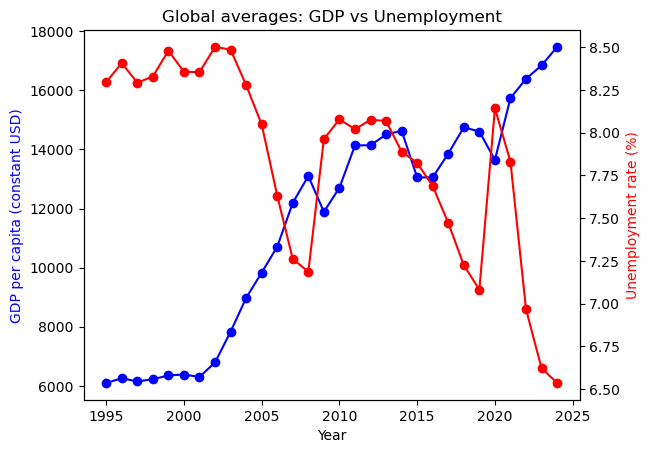

In [104]:
# plot for average for both GDP per capita and unemployment rate 
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(avg["Year"], avg["GDP_pc"], color="blue", marker="o", label="GDP per capita")
ax2.plot(avg["Year"], avg["Unemployment_rate"], color="red", marker="o", label="Unemployment rate")

# Labels
ax1.set_xlabel("Year")
ax1.set_ylabel("GDP per capita (constant USD)", color="blue")
ax2.set_ylabel("Unemployment rate (%)", color="red")

plt.title("Global averages: GDP vs Unemployment")
plt.show()

The graph indicates a steady growth of global GDP per capita over the period, with small dips during the 2008 financial crisis and the 2020 pandemic. While the unemployment rate declined overall, it spiked during the crises of 2008–2009 and 2020 before falling sharply afterward. The analysis reveals a clear negative correlation: as GDP rises, the unemployment rate tends to fall.


In [107]:
# calculate the growth rates
merged_aggregates = merged_aggregates.assign(
    GDP_growth=merged_aggregates.groupby("Country Code")["GDP_pc"].pct_change(fill_method=None),
    Unemployment_growth_rate=merged_aggregates.groupby("Country Code")["Unemployment_rate"].pct_change(fill_method=None)
)

merged_countries = merged_countries.assign(
    GDP_growth=merged_countries.groupby("Country Code")["GDP_pc"].pct_change(fill_method=None)
)

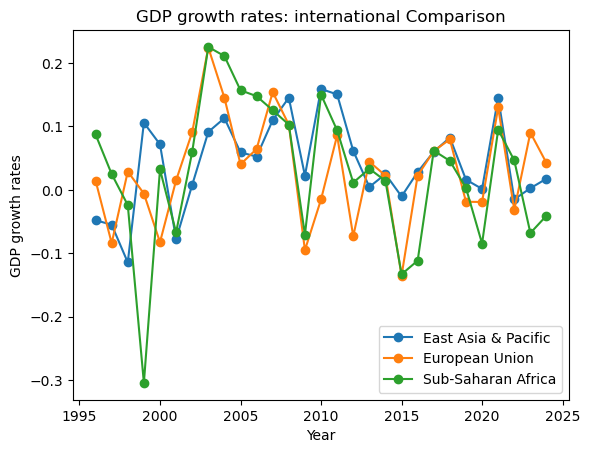

In [109]:
# plot the growhth rates for the different regions

# filter data
EAS = merged_aggregates[merged_aggregates["Country Code"] == "EAS"].sort_values("Year")
EUU = merged_aggregates[merged_aggregates["Country Code"] == "EUU"].sort_values("Year")
SSF = merged_aggregates[merged_aggregates["Country Code"] == "SSF"].sort_values("Year")

# plot the growth rates
plt.plot(EAS["Year"], EAS["GDP_growth"], marker="o", label = "East Asia & Pacific")
plt.plot(EUU["Year"], EUU["GDP_growth"], marker="o", label = "European Union")
plt.plot(SSF["Year"], SSF["GDP_growth"], marker="o", label = "Sub-Saharan Africa")

# labels
plt.xlabel("Year")
plt.ylabel("GDP growth rates")
plt.title("GDP growth rates: international Comparison")
plt.legend()
plt.show()

The plot shows consistently higher and more resilient growth in East Asia & Pacific. In contrast, the EU and Sub-Saharan Africa follow lower growth paths with comparable volatility, though Africa experienced a particularly sharp downturn around 2000. This signficiant drop around 2000 likely reflects a combination of external shocks (particularly falling commodity prices), high dept burdends, and structural weaknesses.

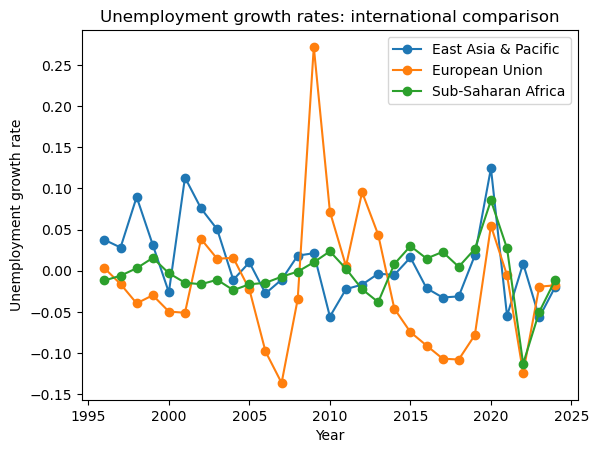

In [112]:
# plot the unemployment growth rates
plt.plot(EAS["Year"], EAS["Unemployment_growth_rate"], marker="o", label="East Asia & Pacific")
plt.plot(EUU["Year"], EUU["Unemployment_growth_rate"], marker="o", label="European Union")
plt.plot(SSF["Year"], SSF["Unemployment_growth_rate"], marker="o", label="Sub-Saharan Africa")

plt.xlabel("Year")
plt.ylabel("Unemployment growth rate")
plt.legend()
plt.title("Unemployment growth rates: international comparison")
plt.show()

The unemployment growth rate is more volatile in the EU, with sharp spiked during the crises in 2009 and 2020. On the contrary, East Asia & Pacific shows smaller fluctuations, while Sub-Saharan Africa remains relatively stable with mild changes, though it also reflects the pandemic shock.

## Germany vs. USA

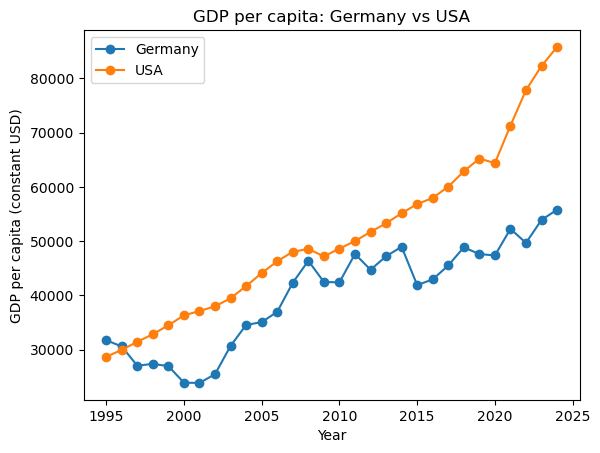

In [116]:
# create the plot: GDP for both countries
# Filter data
germany = merged[merged["Country Name"] == "Germany"].sort_values("Year")
usa     = merged[merged["Country Name"] == "United States"].sort_values("Year")

# plot for Germany
plt.plot(germany["Year"], germany["GDP_pc"], marker="o", label="Germany")

# plot for USA
plt.plot(usa["Year"], usa["GDP_pc"], marker="o", label="USA")

# Labels
plt.xlabel("Year")
plt.ylabel("GDP per capita (constant USD)")
plt.title("GDP per capita: Germany vs USA")
plt.legend()
plt.show()


Both Germany and the USA show steady increase in GDP per capita, but within the focus period the USA maintains a much higher level and stronger upward trend, especially after 2015. Overall, Germany grows more moderately and with more fluctuations. Reasons for these differences reflect higher stronger productivity, demographics and innovation in the USA compared to Germany.Both Germany and the USA show steady increases in GDP per capita, but during the focus period the USA maintains a much higher level and a stronger upward trend, especially after 2015. Germany grows more moderately and with more fluctuations. These differences largely reflect stronger productivity, more favorable demographics, and higher innovation in the USA compared to Germany.

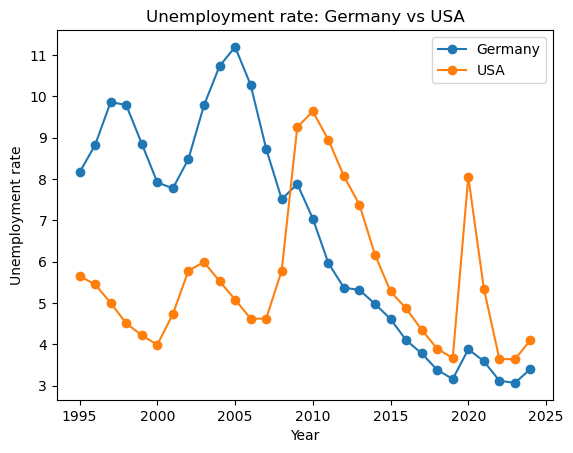

In [119]:
# create plot: unemployment rate for both countries
# Scatter or line plot for Germany
plt.plot(germany["Year"], germany["Unemployment_rate"], marker="o", label="Germany")

# Scatter or line plot for USA
plt.plot(usa["Year"], usa["Unemployment_rate"], marker="o", label="USA")

# Labels
plt.xlabel("Year")
plt.ylabel("Unemployment rate")
plt.title("Unemployment rate: Germany vs USA")
plt.legend()
plt.show()

The unemployment rate in Germany was consistently higher than in the USA until 2009. After 2009, Germany experienced a sharp decline and stabilized at much lower levels. In contrast, the USA saw a surge during the 2008–2009 financial crisis and again during the pandemic, but later returned to more moderate levels similar to Germany.

In [122]:
# From previous graphs we saw indicators that the gdp growth seems to negatively correlate with the unemployment rate.
# in the following I directly want to test Okun's Law:

# calculate the change in the unemployment rate in percentage points
merged_countries.loc[:, "Unemployment_change"] = (
    merged_countries.groupby("Country Code")["Unemployment_rate"].diff()
)
# calculate the pearson correlation between GDP growth vs Unemployment change
merged_countries[["GDP_growth", "Unemployment_change"]].corr()

,GDP_growth,Unemployment_change
GDP_growth,1.000000,-0.191182
Unemployment_change,-0.191182,1.000000


The table shows a correlation between GDP growth and unemployment change of -0.19, consistent with Okun's Law. This suggests that higher economic growth is generally associated with falling unemployment, although  the relationship is not very stron in this dataset.